In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_data = pd.read_csv("AAPL.csv")

In [3]:
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-04,164.889999,167.039993,164.309998,165.789993,164.909760,81235400
1,2023-05-05,170.979996,174.300003,170.759995,173.570007,172.648483,113316400
2,2023-05-08,172.479996,173.850006,172.110001,173.500000,172.578827,55962800
3,2023-05-09,173.050003,173.539993,171.600006,171.770004,170.858017,45326900
4,2023-05-10,173.020004,174.029999,171.899994,173.559998,172.638504,53724500
...,...,...,...,...,...,...,...
247,2024-04-29,173.369995,176.029999,173.100006,173.500000,173.500000,68169400
248,2024-04-30,173.330002,174.990005,170.000000,170.330002,170.330002,65934800
249,2024-05-01,169.580002,172.710007,169.110001,169.300003,169.300003,50383100
250,2024-05-02,172.509995,173.419998,170.889999,173.029999,173.029999,94214900


In [5]:
# Calculating the Volatility

stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
volatility = stock_data['Returns'].std()
print("Calculated Volatility:", volatility)

Calculated Volatility: 0.01303106824375412


The calculated volatility for the daily returns of Apple Inc. (AAPL) stock is approximately 0.013 or 1.3%.

Volatility represents the degree of variation of a trading price series over time, measured by the standard deviation of 
logarithmic returns. In simpler terms, it indicates how much the price of the stock fluctuates on a day-to-day basis.
A volatility of 1.3% means that on most days, the price of Apple's stock is expected to move up or down by about 1.3% from the previous day's closing price. This is a measure of risk; higher volatility often 
implies higher risk, but it also presents opportunities for investors to potentially benefit from rapid price changes.

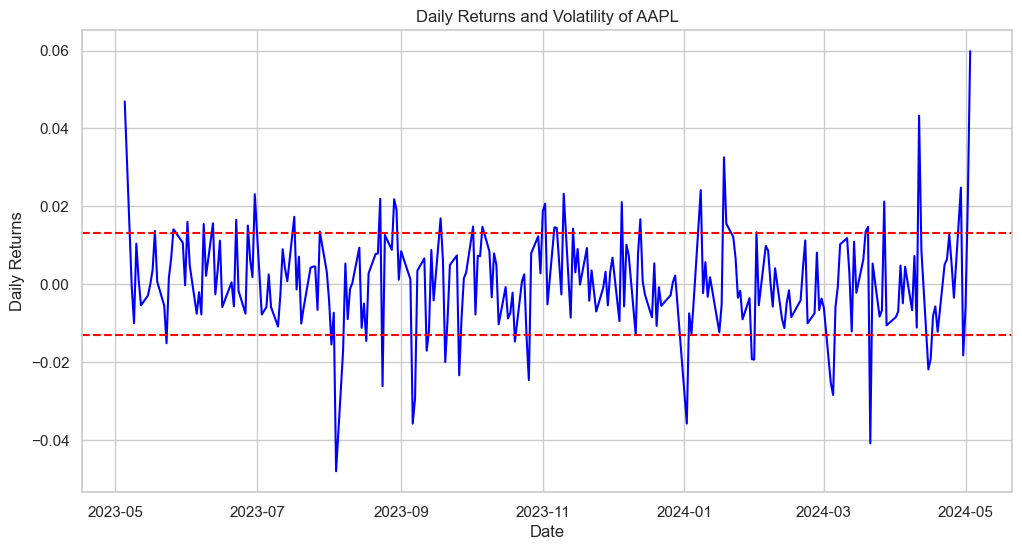

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(x=stock_data['Date'], y=stock_data['Returns'], color='blue')
plt.axhline(y=volatility, color='red', linestyle='--')
plt.axhline(y=-volatility, color='red', linestyle='--')
plt.title('Daily Returns and Volatility of AAPL')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()


Monte Carlo Method

In [7]:
#Setting up the parameters

S0 = 183.38  # Starting stock price from the most recent data
K = 183.38  # Strike price
T = 1  # Time to expiration in years
r = 0.01  # Risk-free rate
sigma = 0.2067  # Volatility, recalculated to 20.67% anually
num_simulations = 10000  # Number of simulations
num_steps = 12  # Number of steps (monthly)

# Time increment per step
dt = T / num_steps


In [8]:
# Monte- Carlo Simulations

simulated_end_prices = np.zeros(num_simulations)
call_payoffs = np.zeros(num_simulations)
put_payoffs = np.zeros(num_simulations)

# Seed for reproducibility
np.random.seed(0)

# Monte Carlo simulation of stock price paths
for i in range(num_simulations):
    S_t = S0
    for j in range(num_steps):
        # Generate a random standard normal value
        Z = np.random.normal()
        # Calculate the stock price at next step
        S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    
    simulated_end_prices[i] = S_t
    
    # Calculate the call and put payoffs
    call_payoffs[i] = max(S_t - K, 0)
    put_payoffs[i] = max(K - S_t, 0)

mean_call_payoff = np.mean(call_payoffs)
mean_put_payoff = np.mean(put_payoffs)
call_option_price_mc = np.exp(-r * T) * mean_call_payoff
put_option_price_mc = np.exp(-r * T) * mean_put_payoff

call_option_price_mc, put_option_price_mc


(16.094426870067373, 13.92511997770731)

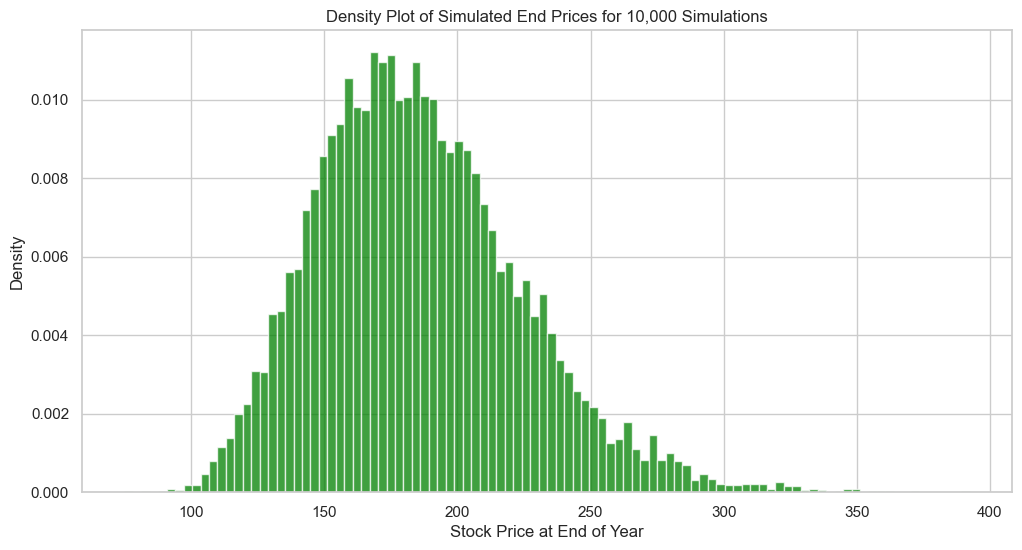

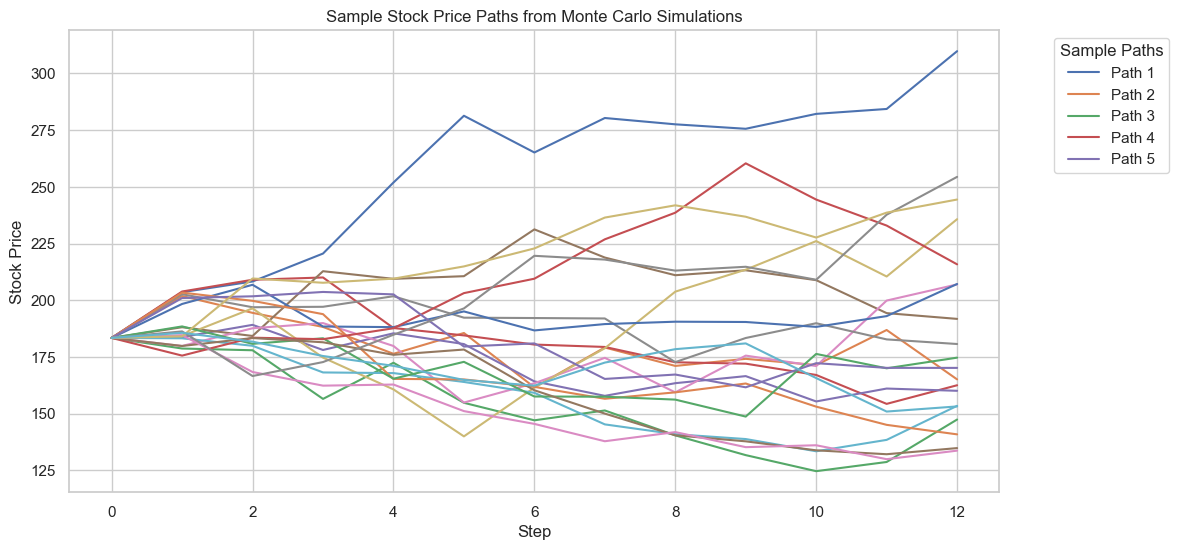

In [9]:
plt.figure(figsize=(12, 6))
plt.hist(simulated_end_prices, bins=100, density=True, alpha=0.75, color='green')
plt.title('Density Plot of Simulated End Prices for 10,000 Simulations')
plt.xlabel('Stock Price at End of Year')
plt.ylabel('Density')
plt.grid(True)

# Generate a plot showing 20 example paths from the simulations
plt.figure(figsize=(12, 6))
sample_paths = 20  # number of sample paths to show
for i in range(sample_paths):
    stock_prices = [S0]
    S_t = S0
    np.random.seed(i)  # different seed for each path
    for j in range(num_steps):
        Z = np.random.normal()
        S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
        stock_prices.append(S_t)
    plt.plot(range(num_steps + 1), stock_prices, label=f'Path {i + 1}' if i < 5 else '')

plt.title('Sample Stock Price Paths from Monte Carlo Simulations')
plt.xlabel('Step')
plt.ylabel('Stock Price')
plt.legend(title="Sample Paths", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

St(Simulated Stock Price): Starts at  S and evolves over time based on a random sample from a normal distribution, which is scaled by the volatility and the square root of the time step size.
dt (Time Increment per Step): T divided by the number of steps in the simulation, representing how much time each step in the simulation represents.

Z (Random Standard Normal Variable): Randomly sampled value affecting the stock price at each step, representing the random walk theory of stock price movement

Monte Carlo Option Prices:

Call Option Price: $16.09
Put Option Price: $13.93
Scenario 1: Stock Price Ends Higher at $200
Call Option:

End-of-Year Stock Price: $200
Outcome: The call option is "in the money", allowing the option holder to buy shares at $183.38 (the strike price), significantly below the market price of $200.
Payoff per Share: $200 - $183.38 = $16.62
Total Payoff for 100 Shares: $16.62 × 100 = $1662
Net Profit: Assuming the option premium is the Monte Carlo call option price times 100 shares, $1662 - ($16.09 × 100) = $1662 - $1609 = $53.
Put Option:

Outcome: The put option remains "out of the money" since the market price is higher than the strike price, which provides no incentive to exercise the option.
Payoff: $0 (The option is not exercised).
Net Loss: Assuming the premium is the put option price times 100 shares, $13.93 × 100 = $1393.
Scenario 2: Stock Price Ends Lower at $160
Call Option:

End-of-Year Stock Price: $160
Outcome: The call option is "out of the money". Exercising the option to buy at $183.38 when the market price is only $160 does not make financial sense.
Payoff: $0 (The option is not exercised).
Net Loss: Premium paid, $16.09 × 100 = $1609.
Put Option:

Outcome: The put option is "in the money" as it allows selling shares at $183.38, above the market price of $160.
Payoff per Share: $183.38 - $160 = $23.38
Total Payoff for 100 Shares: $23.38 × 100 = $2338
Net Profit: $2338 - ($13.93 × 100) = $2338 - $1393 = $945.









Comparing with Black–Scholes model


In [10]:
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """Calculate the Black-Scholes price for a European call option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = (S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    return call_price

def black_scholes_put(S, K, T, r, sigma):
    """Calculate the Black-Scholes price for a European put option."""
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = (K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))
    return put_price



call_price = black_scholes_call(S0, K, T, r, sigma)
put_price = black_scholes_put(S0, K, T, r, sigma)

print("Call Option Price: {:.2f}".format(call_price))
print("Put Option Price: {:.2f}".format(put_price))

Call Option Price: 15.95
Put Option Price: 14.12


The formula uses these parameters to calculate d1 and d2
, which are intermediate calculations that feed into the normal distribution function to determine the probabilities essential in option pricing. The call and put option prices are then derived using these probabilities to reflect how in-the-money or out-of-the-money these options are.

In [11]:
print("Black-Scholes Call Price: ${:.2f}, Monte Carlo Call Price: ${:.2f}".format(call_price, call_option_price_mc))
print("Black-Scholes Put Price: ${:.2f}, Monte Carlo Put Price: ${:.2f}".format(put_price, put_option_price_mc))

Black-Scholes Call Price: $15.95, Monte Carlo Call Price: $16.09
Black-Scholes Put Price: $14.12, Monte Carlo Put Price: $13.93


Both the Monte Carlo simulations and the Black-Scholes model yield closely aligned estimates for the option prices, demonstrating slight variations that reflect the different underlying assumptions and methodologies of each model.

Call Option Pricing:

The call option price derived from the Monte Carlo simulation is marginally higher ($16.09) than that calculated using the Black-Scholes model ($15.95). This slight difference could be attributed to the Monte Carlo method's ability to incorporate a range of possible price trajectories through its stochastic approach. This method is particularly sensitive to scenarios that may not adhere strictly to the log-normal distribution assumed by the Black-Scholes model, potentially accounting for higher price movements that elevate the average payoff of the call option.

Put Option Pricing:

Conversely, the put option price is slightly lower in the Monte Carlo simulation ($13.93) compared to the Black-Scholes model ($14.12). This difference could be due to the Black-Scholes assumption of a continuous, log-normally distributed model of stock price movements, which might overestimate the likelihood or impact of significant downward movements (tail risk). The Monte Carlo simulation, by generating discrete paths and capturing a broader spectrum of downward movements, may provide a more tempered estimation of extreme market conditions.

Variance reduction using Control Variate technique

In [13]:
np.random.seed(0)

control_call_payoffs = np.zeros(num_simulations)
control_put_payoffs = np.zeros(num_simulations)

for i in range(num_simulations):
    S_t = S0
    for j in range(num_steps):
        Z = np.random.normal()
        S_t *= np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    control_call_payoffs[i] = max(S_t - K, 0)
    control_put_payoffs[i] = max(K - S_t, 0)

# Calculate the theoretical Black-Scholes prices for use as control variates
bs_call_price = black_scholes_call(S0, K, T, r, sigma)
bs_put_price = black_scholes_put(S0, K, T, r, sigma)

# Calculate mean payoffs from simulation
mean_call_payoff = np.mean(control_call_payoffs)
mean_put_payoff = np.mean(control_put_payoffs)

# Adjust Monte Carlo estimates using control variates
adjusted_call_price_mc = np.exp(-r * T) * (mean_call_payoff + (bs_call_price - mean_call_payoff))
adjusted_put_price_mc = np.exp(-r * T) * (mean_put_payoff + (bs_put_price - mean_put_payoff))

print(f"Adjusted Call Option Price: {adjusted_call_price_mc:.2f}")
print(f"Adjusted Put Option Price: {adjusted_put_price_mc:.2f}")

Adjusted Call Option Price: 15.79
Adjusted Put Option Price: 13.98
